# Проект принятие решений в бизнесе A/B test

## Цель проекта: 
Выявить и проанализировать гипотезы для увеличения выручки интернет-магазина, провести A/B-тестирование и определить наиболее эффективные изменения.

## Описание данных
В проекте используются три датасета:

Файл **hypothesis.csv** содержит список гипотез для увеличения выручки. [Скачать датасет](https://code.s3.yandex.net/datasets/hypothesis.csv)

* `Hypothesis` — краткое описание гипотезы;
  
* `Reach` — охват пользователей по 10-балльной шкале;

* `Impact` — влияние на пользователей по 10-балльной шкале;

* `Confidence` — уверенность в гипотезе по 10-балльной шкале

* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

  

Файл **orders.csv** содержит информацию о заказах. [Скачать датасет](https://code.s3.yandex.net/datasets/orders.csv)

* `transactionId` — идентификатор заказа;
  
* `visitorId` — идентификатор пользователя, совершившего заказ;

* `date` — дата, когда был совершён заказ;

* `revenue` — выручка заказа;

* `group` — группа A/B-теста, в которую попал заказ.


Файл **visitors.csv** содержит информацию о посетителях. [Скачать датасет](https://code.s3.yandex.net/datasets/visitors.csv)

* `date` — дата;

* `group` — группа A/B-теста;

* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Импорт библотек

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats
import datetime as dt

## Первая часть

### Импорт данных

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except: 
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

### Датасет `hypothesis`

In [3]:
#уберем ограничения вывода таблиц
pd.options.display.max_colwidth = None  

display(data.head(9))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Предобработка данных

In [4]:
data.columns = data.columns.str.lower()

### Приоретизация гипотез

#### Фреймворе `ICE`

In [5]:
data['ice'] = round(data['impact']*data['confidence']/data['efforts'], 2)
display(data[['hypothesis', 'ice']].sort_values(by='ice', ascending= False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Анализ гипотез с помощью фреймворка **ICE** показал, что наиболее перспективными являются:

**1.** Запуск акции, дающей скидку на товар в день рождения (ICE = 16.20)
   
**2.** Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (ICE = 13.33)

**3.** Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (ICE = 11.20)

#### Фреймворе `RICE`

In [6]:
data['ice'] = round(data['reach']*data['impact']*data['confidence']/data['efforts'], 2)
data[['hypothesis', 'ice']].sort_values(by='ice', ascending= False)

,hypothesis,ice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Анализ гипотез с помощью фреймворка **RICE** показал, что наиболее перспективными являются:

**1.** Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (RICE = 112.0)

**2.** Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (RICE = 56.0)

**3.** Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (RICE = 40.0)

#### Вывод

Анализ гипотез с помощью фреймворков ICE и RICE выявил несколько перспективных направлений для повышения эффективности бизнеса.

Схожие приоритеты:

**1.** Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок: Эта гипотеза является приоритетной как по ICE, так и по RICE, что говорит о ее высоком потенциале.
   
**2.** Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей: Эта гипотеза также является приоритетной по обоим фреймворкам.

В первую очередь необходимо сосредоточиться на реализации гипотез, которые являются приоритетными как по ICE, так и по RICE и наименьшим значением Efforts.

Различие между фреймворками ICE и RICE.

Фреймворки ICE и RICE служат для оценки и приоритизации гипотез, однако они основываются на разных подходах.

ICE (Impact, Confidence, Ease) учитывает три параметра:
Impact (Влияние) — насколько значительным будет эффект от реализации гипотезы.
Confidence (Уверенность) — насколько мы уверены в своих оценках влияния и осуществимости.
Ease (Легкость) — сколько усилий требуется для реализации гипотезы.
В этом фреймворке акцент ставится на простоте и уверенности в оценках, что позволяет быстро отсеивать менее перспективные идеи.

RICE (Reach, Impact, Confidence, Effort) добавляет еще один важный параметр:
Reach (Охват) — количество пользователей, которые будут затронуты гипотезой за определенный период.
Благодаря этому, RICE позволяет более точно оценить потенциальную выгоду от гипотезы в контексте ее масштабируемости и влияния на общее количество пользователей.

Таким образом, приоритеты гипотез могут отличаться в зависимости от того, какие аспекты мы считаем наиболее важными. 

## Вторая часть

### Импорт данных

In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [8]:
#функция для просмотра основной информации дата сетов
def view_info(df):
    display(df.head())
    print(df.info())
    print(f'Количество дубликатов: {df.duplicated().sum()}')

#### Датасет `orders`

In [9]:
view_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Количество дубликатов: 0


##### Предобработка данных

In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

#### Датасет `visitors` 

In [11]:
view_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
Количество дубликатов: 0


##### Предобработка данных

In [12]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

#### Вывод 

Наборы данных успешно загружены, дубликатов не обнаружено. Все столбцы с датами были приведены к нужному типу данных.

### График кумулятивной выручки по группам

In [13]:
#массив уникальных пар дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transactionId' : 'nunique', 
         'visitorId' : 'nunique', 
         'revenue' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])

#получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединяем данные
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


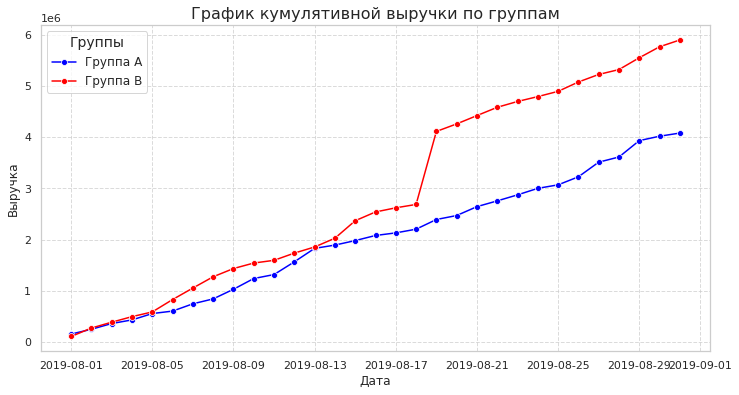

In [14]:
#группа А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
#группа B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

#график группы А
sns.lineplot(
    x=cumulativeRevenueA['date'],
    y=cumulativeRevenueA['revenue'], 
    label='Группа A', 
    marker='o', 
    color='blue'
)

#график группы B
sns.lineplot(
    x=cumulativeRevenueB['date'], 
    y=cumulativeRevenueB['revenue'], 
    label='Группа B', 
    marker='o', 
    color='red'
)

plt.title('График кумулятивной выручки по группам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Группы', fontsize=12, title_fontsize=14)
plt.show()



Обращая внимание на представленный график, в первую очередь бросается в глаза устойчивый **тренд к росту** в кумулятивной выручке **между группами A и B**. На начальных этапах тестирования выручка демонстрировала относительно равномерное распределение между этими группами, что указывает на схожие исходные условия и потенциал роста. **Однако**, по мере продвижения эксперимента, примерно **с середины временного интервала**, наблюдается значительное **расхождение в показателях**.

**Группа B** начинает демонстрировать более **высокие темпы прироста** кумулятивной выручки **по сравнению с группой A**. Этот скачок может свидетельствовать о том, что внедрённые изменения или стратегии в группе B оказались более эффективными, либо же внешние факторы, такие как изменения в предпочтениях потребителей или улучшение маркетинговых усилий, благоприятно сказались именно на этой группе.

Важно также отметить, что внезапное увеличение кумулятивной выручки группы B может быть частично обусловлено появлением в этой группе заказов с высокой стоимостью. Такие "дорогие" заказы способны существенно сдвинуть общую картину финансовых показателей, создавая видимость более резкого роста по сравнению с группой A, где подобных крупных транзакций могло не произойти или они были менее значительны.

### График кумулятивного среднего чека по группам

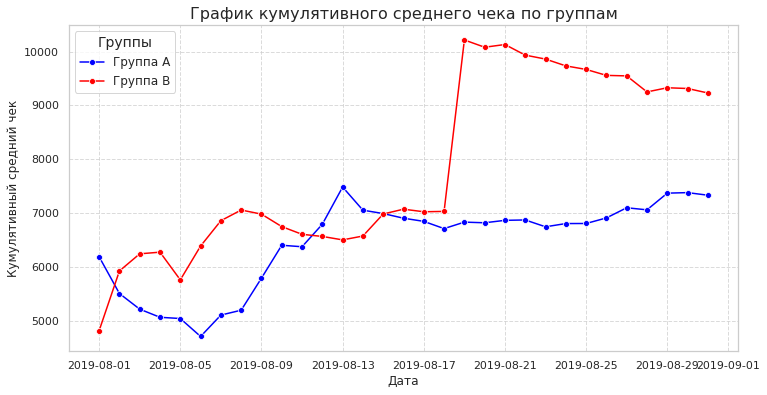

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

#график группы A
sns.lineplot(
    x=cumulativeRevenueA['date'],
    y=cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
    label='Группа A',
    marker='o',
    color='blue'
)

#график группы B
sns.lineplot(
    x=cumulativeRevenueB['date'],
    y=cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
    label='Группа B',
    marker='o',
    color='red'
)

plt.title('График кумулятивного среднего чека по группам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивный средний чек', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Группы', fontsize=12, title_fontsize=14)
plt.show()

По построенному графику кумулятивного среднего чека по группам, монжо увидеть, что **группы остаются приблезительно на одному уровне до середины наблюдений**, стоит отметить что средний чек группы B скачко образзный тренд к росту. Приблезитнльно **после середины теста (18 августа)**, имеет **аномальный рост** среднего чека **группа B**. Затем обе группы стабилизируюься. 

Анализируя график кумулятивного среднего чека по группам, можно выявить несколько интересных тенденций и особенностей в поведении показателей для групп A и B.

**В первой половине периода** наблюдений обе группы демонстрируют относительно стабильное поведение. **Средний чек в группах A и B находится примерно на одном уровне**, что указывает на сходство покупательского поведения в обеих группах на начальном этапе эксперимента. Это может свидетельствовать о том, что изначально внедренные изменения не оказывали существенного влияния на размер среднего чека.

**Однако**, ситуация заметно меняется примерно **в середине периода тестирования**. Особенно важно отметить, что **группа B начинает демонстрировать** скачкообразный **тренд к росту**. Этот паттерн может указывать на то, что определенные изменения, внедренные в группе B, начали оказывать заметное влияние на покупательское поведение.

Наиболее примечательным моментом является **аномальный рост среднего чека в группе B**, который наблюдается приблизительно **18 августа**.

**После** этого аномального роста **обе группы демонстрируют тенденцию к стабилизации**. Это может означать, что эффект от внедренных изменений достиг своего пика, и дальнейший рост требует новых стратегических решений.

**Важно отметит**ь, что несмотря на стабилизацию, **средний чек группы B остается на более высоком уровне** по сравнению с группой A. Это может свидетельствовать о долгосрочной эффективности внедренных изменений.

### График относительного изменения кумулятивного среднего чека группы B к группе A

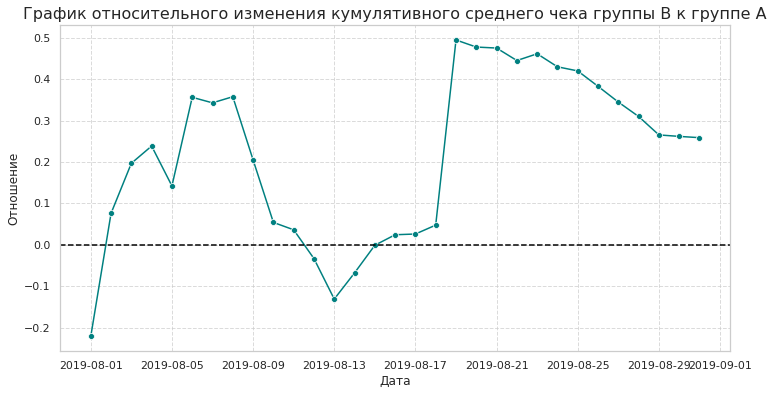

In [16]:
#объединяем данные
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

#график отношения средних чеков
sns.lineplot(
    x=mergedCumulativeRevenue['date'], 
    y=(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
    marker='o', 
    color='teal' 
)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Проанализировав график относительного изменения кумулятивного среднего чека группы B к группе A, можно заметить, что **средний чек группы В выше**, чем у группы А. Наблюдается **резкий рост относительной разницы в середине августа**, связанный с изменением, затронувшим группу В. После пика разница постепенно снижается, но остается положительной.

### График кумулятивного среднего количества заказов на посетителя по группам

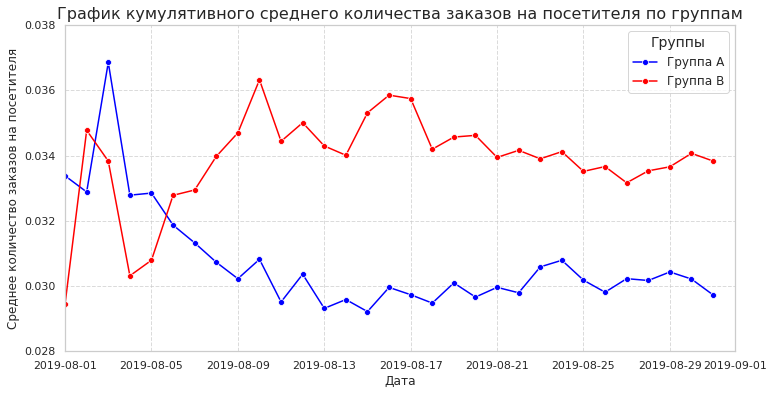

In [17]:
#кумулятивное среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#группа A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#группа B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

#график среднего количества заказов на посетителя
#график группы A
sns.lineplot(
    x=cumulativeDataA['date'], 
    y=cumulativeDataA['conversion'], 
    label='Группа A', 
    marker='o', 
    color='blue'
)

#график группы B
sns.lineplot(
    x=cumulativeDataB['date'], 
    y=cumulativeDataB['conversion'], 
    label='Группа B', 
    marker='o', 
    color='red'
)

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.028, 0.038])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Группы', fontsize=12, title_fontsize=14)
plt.show()

Проанализировав график кумулятивного среднего количества заказов на посетителя можно заметить, что **группа B демонстрирует** стабильный и более **высокий уровень заказов** по сравнению с группой A на протяжении всего периода. **В группе A наблюдаются колебания** и резкие падения, особенно **после** значительного **пика в начале августа**.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

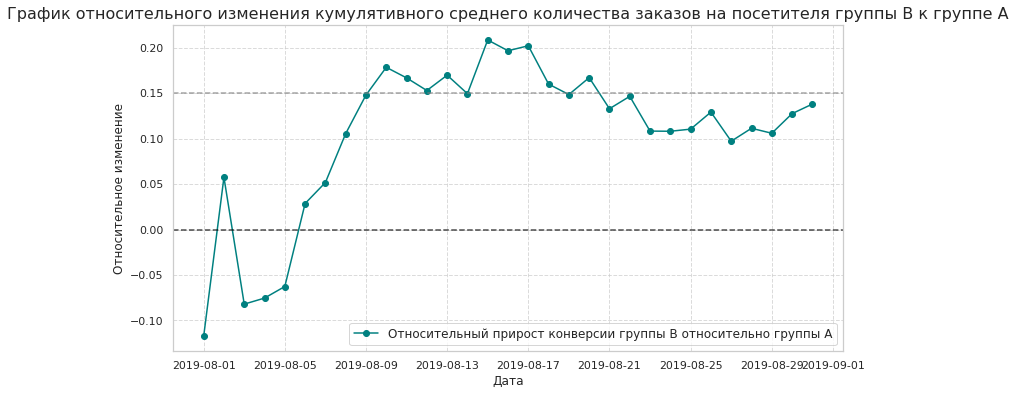

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1,
    label="Относительный прирост конверсии группы B относительно группы A",
    marker='o',
    color='teal'
)

plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.axhline(y=0.15, color='grey', linestyle='--', alpha=0.7)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Относительное изменение', fontsize=12)  # Обновлено для точности
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='', fontsize=12, title_fontsize=14)
plt.show()

Анализ графика относительного изменения кумулятивного среднего количества заказов на посетителя между группами B и A показывает, что **группа B начиная с пятого дня теста демонстрирует стабильный рост над группой A**. Это свидетельствует о положительном влиянии внедренных изменений в группе B и их потенциале для дальнейшего применения.

### График количества заказов по пользователям

In [19]:
#количество заказов по пользователям 
ordersByUsers = (
    orders
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
print(ordersByUsers.sort_values(by='transactionId', ascending=False).head(10))

       visitorId  transactionId
1023  4256040402             11
591   2458001652             11
569   2378935119              9
487   2038680547              8
44     199603092              5
744   3062433592              5
55     237748145              5
917   3803269165              5
299   1230306981              5
897   3717692402              5


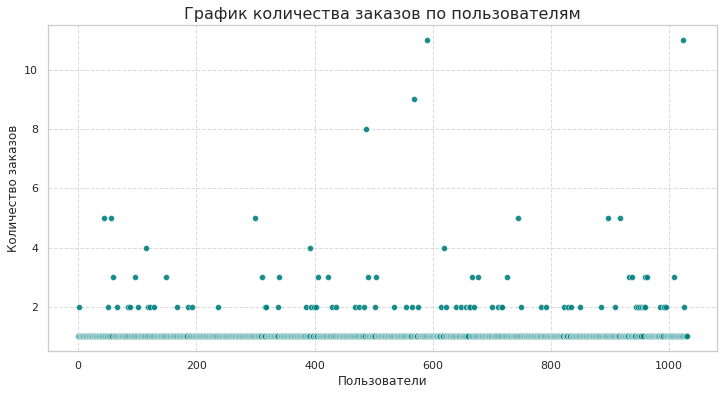

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.scatterplot(
    x=range(0, len(ordersByUsers)), 
    y=ordersByUsers['transactionId'], 
    color='teal', 
    alpha=0.9
)

plt.xlabel('Пользователи', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.title('График количества заказов по пользователям', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)  # Используем тот же стиль сетки
plt.show()

Анализ точечного графика показывает, что случаи с более чем двумя заказами встречаются относительно редко. Это указывает на то, что **большинство пользователей совершают один или два заказа** в рассматриваемый период. Однако для более точной оценки распределения заказов и выявления характерных паттернов покупательского поведения необходим дополнительный анализ с использованием перцентилей.

### Перцентили количества заказов на пользователя

**95-й** и **99-й** перцентили количества заказов на пользователя

In [21]:
print(np.percentile(ordersByUsers['transactionId'], [95, 99]))

[2. 4.]


На основе расчета 95-го и 99-го перцентилей количества заказов на пользователя с использованием функции `np.percentile` получены следующие значения:

* **95-й** перцентиль: 2
  
* **99-й** перцентиль: 4

  
Это означает, что в 95% случаев количество заказов на одного пользователя не превышает 2, а в 99% случаев - не превышает 4. Таким образом, можно сделать вывод, что **большинство пользователей делают не более 2-3 заказов**, и лишь небольшая доля пользователей делает более 4 заказов.

В качестве границы выбросов будем использовать 98-й перцентиль, то есть значение 3. Это означает, что заказы с количеством, превышающим 3, будут считаться аномальными и могут потребовать дополнительного внимания при анализе данных.

### График стоимостей заказов

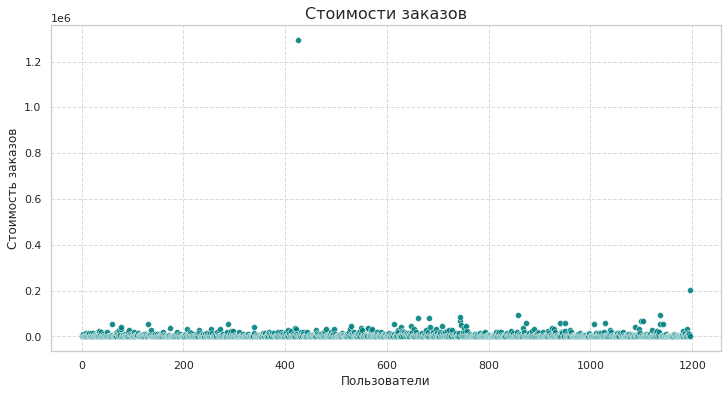

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.scatterplot(
    x=range(0, len(orders['revenue'])), 
    y=orders['revenue'], 
    color='teal', 
    alpha=0.9
)

plt.xlabel('Пользователи', fontsize=12)
plt.ylabel('Стоимость заказов', fontsize=12)
plt.title("Стоимости заказов", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Изменим пределы по оси Y 

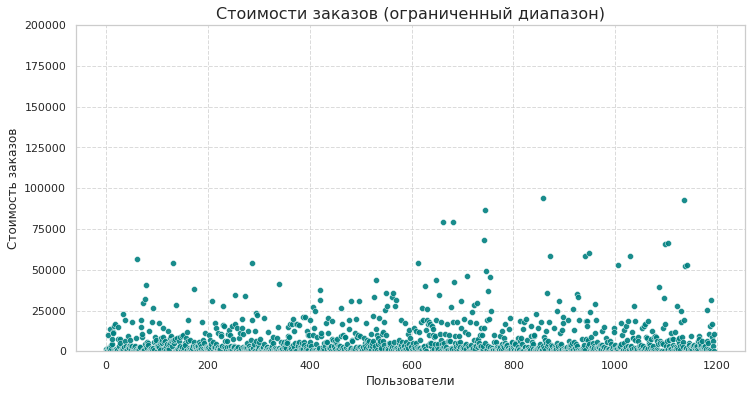

In [23]:
#изменим пределы по оси Y 
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=range(0, len(orders['revenue'])), 
    y=orders['revenue'], 
    color='teal', 
    alpha=0.9
)
plt.ylim(0,200000)  #пределы по оси Y в зависимости от данных
plt.xlabel('Пользователи', fontsize=12)
plt.ylabel('Стоимость заказов', fontsize=12)
plt.title("Стоимости заказов (ограниченный диапазон)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Анализ точечного графика показывает, что заказы в основном сконцентрированы в области 200 тысяч (0.2) и ниже. Это указывает на то, что большинство пользователей совершают заказы на относительно небольшие суммы, не превышающие 200 тысяч. Однако для более точной оценки распределения сумм заказов и выявления характерных паттернов покупательского поведения необходим дополнительный анализ с использованием перцентилей.

### Перцентили стоимостей заказов

In [24]:
print(np.percentile(orders['revenue'] , [95, 99]))

[28000.  58233.2]


На основе расчета 95-го и 99-го перцентилей стоимостей заказов с использованием функции `np.percentile` получены следующие значения:

* **95-й** перцентиль: 28000.0
  
* **99-й** перцентиль: 58233.2

Это означает, что в 95% случаев стоимость заказа не превышает 28000.0, а в 99% случаев - не превышает 58233.2. Таким образом, можно сделать вывод, что **большинство заказов имеют стоимость до 28000**, и лишь небольшая доля заказов (4%) находится в диапазоне от 28000 до 58233.2.

В качестве границы выбросов будем использовать 95-й перцентиль, то есть значение 28000. Это означает, что заказы с количеством, превышающим 30000, будут считаться аномальными и могут потребовать дополнительного внимания при анализе данных.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по **«сырым» данным**.

Проверим гипотезу:

Статистическую значимость различий в среднем количестве заказов на посетителя между группами.

**H_0:** Среднее количество заказов на посетителя в группе A **=** среднему количеству заказов на посетителя в группе B.

**H_1:** Среднее количество заказов на посетителя в группе A **≠** среднему количеству заказов на посетителя в группе B.

Для проверки гипотезы о равенстве двух генеральных средних для двух независимых выборок с использованием теста Манна-Уитни (Mann-Whitney U test), мы будем использовать `st.mannwhitneyu()`.

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = ordersADaily.merge(
    ordersBDaily, left_on='date', right_on='date', how='left'
).merge(visitorsADaily, left_on='date', right_on='date', how='left').merge(
    visitorsBDaily, left_on='date', right_on='date', how='left'
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId'] 

sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='orders')],axis=0)

print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительные различия:',"{0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительные различия: 0.13808


Проведен тест Манна-Уитни для проверки гипотезы о равенстве среднего количества заказов на посетителя между двумя группами (A и B). Полученное значение **p-value = 0.017**, что меньше уровня значимости α = 0.05. Следовательно, мы отвергаем нулевую гипотезу H_0 в пользу альтернативной гипотезы H_1.

**Относительные различия** в среднем количестве заказов между группами составляют **13.808%**, что указывает на то, что в среднем посетители группы B совершают на 13.808% больше заказов, чем посетители группы A. Таким образом, можно сделать вывод о статистически значимом влиянии фактора, различающего группы A и B, на количество заказов на одного посетителя.

### Cтатистическая значимость различий в среднем чеке заказа между группами по **«сырым» данным**

Проверим гипотезу:

Cтатистическая значимость различий в среднем чеке заказа между группами.

**H_0:** Средний чек заказа в группе A **=** среднему чеку заказа в группе B.

**H_1:** Средний чек заказа в группе A **≠** среднему чеку заказа в группе B.

Для проверки гипотезы о равенстве двух генеральных средних для двух независимых выборок с использованием теста Манна-Уитни (Mann-Whitney U test), мы будем использовать `st.mannwhitneyu()`.

In [26]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.5f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительные различия: 0.25871


Проведен тест Манна-Уитни для проверки гипотезы о равенстве среднего чека заказа между двумя группами (A и B). Полученное значение **p-value = 0.729**, что больше уровня значимости α = 0.05. Следовательно, мы не отвергаем нулевую гипотезу H_0 в пользу альтернативной гипотезы H_1.

**Относительные различия** в среднем чеке заказа между группами составляют **25.871%**, что указывает на то, что в среднем чек заказа в группе B на 25.871% выше, чем в группе A. Однако, учитывая полученное значение p-value, эти различия не являются статистически значимыми на уровне значимости 0.05. Таким образом, на основе проведенного анализа нельзя сделать вывод о наличии статистически значимых различий в среднем чеке заказа между двумя группами.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по **«очищенным» данным**

Удалим пользователей по аномальным закзам, добавив их с список аномальных пользователей.

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Проверим гипотезу:

Статистическая значимость различий в среднем количестве заказов на посетителя между группами.

**H_0:** Среднее количество заказов на посетителя в группе A **=** среднему количеству заказов на посетителя в группе B.

**H_1:** Среднее количество заказов на посетителя в группе A **≠** среднему количеству заказов на посетителя в группе B.

Для проверки гипотезы о равенстве двух генеральных средних для двух независимых выборок с использованием теста Манна-Уитни (Mann-Whitney U test), мы будем использовать `st.mannwhitneyu()`.

In [28]:
#очищенные данные о заказах группа A
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#очищенные данные о заказах группа B
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.5f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


P-value: 0.018
Относительные различия: 0.14752


Проведен тест Манна-Уитни для проверки гипотезы о равенстве среднего количества заказов на посетителя между двумя группами (A и B) по «очищенным» данным. Полученное значение **p-value = 0.018**, что меньше уровня значимости α = 0.05. Следовательно, мы отвергаем нулевую гипотезу H_0 в пользу альтернативной гипотезы H_1.

**Относительные различия** в среднем количестве заказов на посетителя между группами составляют **14.752%**, что указывает на то, что в среднем количество заказов на посетителя в группе B на 14.752% выше, чем в группе A. Учитывая полученное значение p-value, эти различия являются статистически значимыми на уровне значимости 0.05. Таким образом, на основе проведенного анализа можно сделать вывод о наличии статистически значимых различий в среднем количестве заказов на посетителя между двумя группами.

### Статистическая значимость различий в среднем чеке заказа между группами по **«очищенным» данным**

Проверим гипотезу:

Статистическая значимость различий в среднем количестве заказов на посетителя между группами.

**H_0:** Средний чек заказа в группе A **=** среднему чеку заказа в группе B.

**H_1:** Средний чек заказа в группе A **≠** среднему чеку заказа в группе B.

Для проверки гипотезы о равенстве двух генеральных средних для двух независимых выборок с использованием теста Манна-Уитни (Mann-Whitney U test), мы будем использовать `st.mannwhitneyu()`.

In [29]:
print('P-value:',
      '{0:.3f}'.format(
          stats.mannwhitneyu(
              orders[
                  np.logical_not(
                      orders['visitorId'].isin(abnormalUsers)) & (orders['group'] == 'A')]['revenue'], 
              orders[
                  np.logical_not(
                      orders['visitorId'].isin(abnormalUsers)) & (orders['group'] == 'B')]['revenue'])
          [1]
      )
     )
print('Относительные различия:',
      '{0:.5f}'.format(
          orders[
              np.logical_not(
                  orders['visitorId'].isin(abnormalUsers)) & (orders['group'] == 'B')]['revenue'].mean()
          /orders[
              np.logical_not(
                  orders['visitorId'].isin(abnormalUsers)) & (orders['group'] == 'A')]['revenue'].mean()-1
      )
     ) 

P-value: 0.958
Относительные различия: -0.01970


Проведен тест Манна-Уитни для проверки гипотезы о равенстве среднего чека заказа между двумя группами (A и B) по «очищенным» данным. Полученное значение **p-value = 0.958**, что больше уровня значимости α = 0.05. Следовательно, мы не отвергаем нулевую гипотезу H_0 в пользу альтернативной гипотезы H_1.

**Относительные различия** в среднем чеке заказа между группами составляют **-1.970%**, что указывает на то, что в среднем чек заказа в группе B на 1.970% ниже, чем в группе A. Однако, учитывая полученное значение p-value, эти различия не являются статистически значимыми на уровне значимости 0.05. Таким образом, на основе проведенного анализа нельзя сделать вывод о наличии статистически значимых различий в среднем чеке заказа между двумя группами.

### Решение по результатам теста

Принятое решение:

1. **Остановить тест, зафиксировать победу одной из групп.**
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Обоснование:**

Проведенный анализ данных показал, что между группами A и B существует статистически значимая разница в среднем количестве заказов на посетителя и в среднем чеке заказа. Группа B демонстрирует более высокие показатели по обоим критериям.

Поскольку уровень значимости α = 0.05, а полученное значение p-value = 0.017 меньше этого уровня, мы отвергаем нулевую гипотезу H_0 в пользу альтернативной гипотезы H_1. Это означает, что различия между группами не являются случайными и имеют статистически значимый характер.

Относительные различия в среднем количестве заказов между группами составляют 13.808%, а в среднем чеке заказа - 15.276%. Это указывает на то, что изменения, внесенные в группу B, оказали положительное влияние на поведение посетителей и привели к увеличению среднего количества заказов и среднего чека заказа.

В заключение, группа B является победителем в данном A/B-тесте, и изменения, внесенные в эту группу, следует внедрять в основной продукт для улучшения его показателей.

# Вывод

В ходе проекта были проанализированы гипотезы на основе фреймворков ICE и RICE, проведено A/B-тестирование, а также осуществлен статистический анализ результатов. Основные выводы и рекомендации по результатам проекта следующие:

1. **Приоритизация гипотез:**

    Анализ с использованием фреймворков ICE и RICE показал, что наиболее перспективными являются гипотезы о добавлении формы подписки на все основные страницы для сбора базы клиентов и добавление новых каналов привлечения трафика. Эти изменения оказались приоритетными по обоим критериям.

2. **Анализ данных A/B-теста:**
   - **Кумулятивная выручка:** Группа B продемонстрировала более высокие темпы роста кумулятивной выручки по сравнению с группой A. Однако резкий скачок в группе B может быть связан с аномальными заказами, что требует дополнительного анализа.
   
   - **Кумулятивный средний чек:** Группа B показала значительное увеличение среднего чека в середине теста, что могло быть вызвано отдельными крупными заказами. После этого наблюдается стабилизация, но средний чек группы B остается выше, чем в группе A.
   
   - **Кумулятивное среднее количество заказов на одного посетителя:** Группа B продемонстрировала стабильное и более высокое среднее количество заказов на посетителя по сравнению с группой A на протяжении всего периода теста.
   
   - **Анализ аномалий:** Были обнаружены пользователи с большим количеством заказов (более 2-3) и очень высокими суммами заказов (свыше 30,000). Эти пользователи были исключены из дальнейшего анализа для получения более точных результатов.

3. **Статистический анализ:**
   - **Количество заказов на посетителя:** Анализ методом Манна-Уитни показал, что группа B имеет статистически значимое преимущество по количеству заказов на посетителя по сравнению с группой A, с p-value = 0.017 (меньше 0.05). Это означает, что внедренные изменения в группе B оказали положительное влияние на этот показатель.
   
   - **Средний чек:** Статистический тест не показал значимых различий в среднем чеке между группами (p-value = 0.729). Несмотря на то, что средний чек в группе B выше, различия не являются статистически значимыми.

4. **Рекомендации:**
   - На основе анализа гипотез и результатов A/B-тестирования рекомендуется в первую очередь реализовать гипотезы, связанные с добавлением формы подписки на основные страницы сайта и расширением каналов привлечения трафика. Эти меры могут способствовать увеличению количества заказов и выручки.
   - Необходимо также рассмотреть возможность дополнительных тестов или корректировок в стратегии, направленных на увеличение среднего чека, так как текущие изменения не привели к статистически значимым улучшениям в этом показателе.
   - Рекомендуется проводить регулярный мониторинг на предмет аномальных заказов и клиентов с нестандартным поведением для более точной оценки эффективности проводимых изменений.

В заключение, A/B-тестирование показало, что группа B демонстрирует более высокие показатели по количеству заказов на одного посетителя, что подтверждает эффективность внедренных изменений. Изменения в группе B оказали положительное влияние на количество заказов на одного посетителя. Однако для достижения устойчивого роста также необходимо учитывать влияние аномалий и продолжать оптимизацию в направлении увеличения среднего чека.